## Demo: Denoising of 3D mitochondrial outer membrane data

This notebook demonstrates applying a SN2N model for a 3D denoising task, assuming that training was already completed via 1_training.ipynb.

The raw data used for generating training data is stored in the <font color="red">'Path:/raw_data'</font> directory.  
the models are by default stored in the <font color="red">'Path:/models'</font> directory.  
We predict the results of all modes for all original raw image files and save them in the <font color="red">'Path:/predictions'</font> directory.

## Apply trained SN2N network to raw image

We use a <font color="red">stitching prediction</font> approach to avoid memory overflow when predicting 3D data. Specifically, we cut the input image into blocks, predict each block separately, and then stitch them back together. The overlapping regions are fused using a weighted average method to combine the prediction results.

-----Parameters------  
<font color="red">=====Important==========</font>  
- <span style="color:blue">img_path:</span>  
    Path of raw images to train.
    
<font color="red">=====Other parameters do not require modification; for details, refer to SN2N.get_options.Predict3D.========</font>  

### Step 1: Define custom parameters.

In [1]:
import os
import sys
from SN2N.inference import Predictor3D
from SN2N.get_options import Predict3D

    
img_path = 'data/raw_data_per'

Predict3D_args = [
    '--img_path', img_path
]
args = Predict3D(Predict3D_args)
print("Arguments received:", args)

Arguments received: Namespace(img_path='data/raw_data_per', overlap_shape='2,256,256')


### Step 2: Execute predicting.

The raw data used for generating training data is stored in the <font color="red">'Path:/raw_data_per'</font> directory.  
the models are by default stored in the <font color="red">'Path:/models'</font> directory.  
We predict the results of all modes for all original raw image files and save them in the <font color="red">'Path:/predictions'</font> directory.

In [2]:
p = Predictor3D(img_path = args.img_path)
p.execute()
print("Predicting completed.")

The path for the raw images used for training is located under:
data/raw_data_per
The training dataset is being saved under:
data\datasets
Models is being saved under:
data\models
Predictions is being saved under:
data\predictions
Frame: 1
Predicting completed.


## Demonstrate prediction results

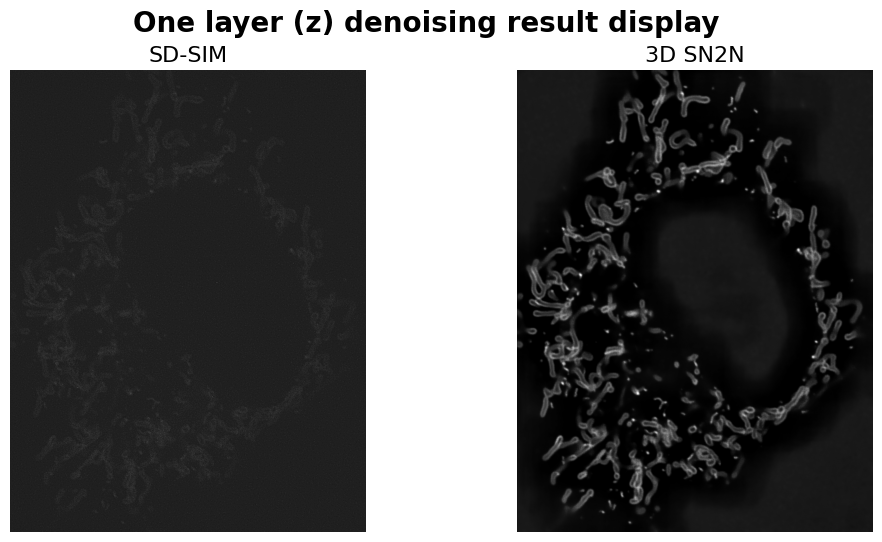

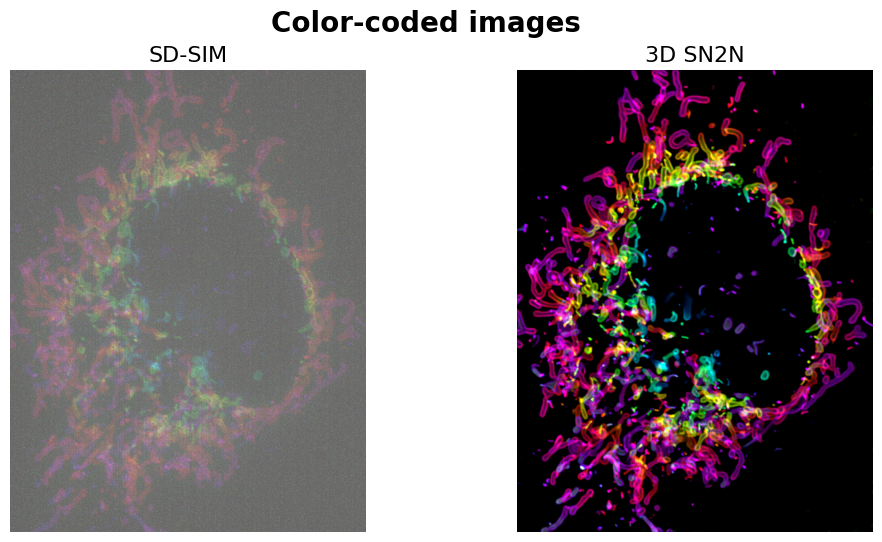

In [10]:
import tifffile
import matplotlib.pyplot as plt

raw_3D = tifffile.imread('data/raw_data/c12_SR_w1L-561_t3.tif')
raw_temp = raw_3D[71, :, :]
prediction3D = tifffile.imread('data/predictions/predictions1.tif_model_2_6_40.pth.tif')
prediction_temp = prediction3D[71, :, :]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(raw_temp, cmap='gray')
axs[0].set_title('SD-SIM', fontsize=16, loc='center')
axs[0].axis('off')


axs[1].imshow(prediction_temp, cmap='gray')
axs[1].set_title('3D SN2N', fontsize=16, loc='center')
axs[1].axis('off')


plt.suptitle("One layer (z) denoising result display", fontsize=20, fontweight='bold')
plt.show()


prediction = tifffile.imread('imgs/predictions.tif')
raw = tifffile.imread('imgs/t3.tif')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(raw, cmap='gray')
axs[0].set_title('SD-SIM', fontsize=16, loc='center')
axs[0].axis('off')


axs[1].imshow(prediction, cmap='gray')
axs[1].set_title('3D SN2N', fontsize=16, loc='center')
axs[1].axis('off')


plt.suptitle("Color-coded images", fontsize=20, fontweight='bold')
plt.show()